In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
tf.__version__

'2.2.0'

In [0]:
import pathlib

In [3]:
!unzip "/content/drive/My Drive/cnn.zip"

Archive:  /content/drive/My Drive/cnn.zip
   creating: cnn/
   creating: cnn/ba1/
  inflating: cnn/ba1/char0048.jpg    
  inflating: cnn/ba1/char0047.jpg    
  inflating: cnn/ba1/char0046.jpg    
  inflating: cnn/ba1/char0045.jpg    
  inflating: cnn/ba1/char0036.jpg    
  inflating: cnn/ba1/char0035.jpg    
  inflating: cnn/ba1/char0034.jpg    
  inflating: cnn/ba1/char0033.jpg    
  inflating: cnn/ba1/char0028.jpg    
  inflating: cnn/ba1/char0027.jpg    
  inflating: cnn/ba1/char0026.jpg    
  inflating: cnn/ba1/char0025.jpg    
  inflating: cnn/ba1/char0020.jpg    
  inflating: cnn/ba1/char0019.jpg    
  inflating: cnn/ba1/char0018.jpg    
  inflating: cnn/ba1/char0017.jpg    
  inflating: cnn/ba1/char0008.jpg    
  inflating: cnn/ba1/char0007.jpg    
  inflating: cnn/ba1/char0006.jpg    
  inflating: cnn/ba1/char0005.jpg    
  inflating: cnn/ba1/char0004.jpg    
  inflating: cnn/ba1/char0003.jpg    
  inflating: cnn/ba1/char0002.jpg    
  inflating: cnn/ba1/char0001.jpg    
   cre

In [4]:
!unzip "/content/drive/My Drive/test.zip"

Archive:  /content/drive/My Drive/test.zip
   creating: test/
   creating: test/Img/
  inflating: test/Img/char0004.jpg   
  inflating: test/Img/char0035.jpg   
  inflating: test/Img/char0048.jpg   
  inflating: test/Img/char0047.jpg   
  inflating: test/Img/char0006.jpg   
  inflating: test/Img/char0017.jpg   
  inflating: test/Img/char0045.jpg   
  inflating: test/Img/char0025.jpg   
  inflating: test/Img/char0018.jpg   
  inflating: test/Img/char0019.jpg   
  inflating: test/Img/char0020.jpg   
  inflating: test/Img/char0026.jpg   
  inflating: test/Img/char0001.jpg   
  inflating: test/Img/char0034.jpg   
  inflating: test/Img/char0033.jpg   
  inflating: test/Img/char0002.jpg   
  inflating: test/Img/char0008.jpg   


In [5]:
data_dir ="/content/cnn"
data_dir = pathlib.Path(data_dir)
test_dir="/content/test"
print(data_dir)

/content/cnn


In [6]:
img_count=len(list(data_dir.glob('*/*')))
print(img_count)
#glob('*') gives the no of images in folders 
#glog('*/*') gives images count in all folders.

1080


In [0]:
class_names=np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])

In [8]:
print(class_names)
print (len(class_names))

['o3' 'sa2' 'tha1' 'ra1' 'la2' 'da1' 'i' 'la1' 'ka1' 'e1' 'e2' 'ba2' 'ta1'
 'ru' 'dha1' 'va' 'ga2' 'ana' 'cha2' 'a1' 'ja2' 'o1' 'u2' 'na' 'ga1' 'ma'
 'sa1' 'sa3' 'um' 'ya' 'ksha' 'da2' 'pa2' 'o2' 'a2' 'ba1' 'dha2' 'ha'
 'ja1' 'ra2' 'ka2' 'pa1' 'u1']
43


In [0]:
aaa=list(data_dir.glob('a1/*'))

In [10]:
print(aaa)

[PosixPath('/content/cnn/a1/char0046.jpg'), PosixPath('/content/cnn/a1/char0033.jpg'), PosixPath('/content/cnn/a1/char0005.jpg'), PosixPath('/content/cnn/a1/char0027.jpg'), PosixPath('/content/cnn/a1/char0007.jpg'), PosixPath('/content/cnn/a1/char0019.jpg'), PosixPath('/content/cnn/a1/char0002.jpg'), PosixPath('/content/cnn/a1/char0035.jpg'), PosixPath('/content/cnn/a1/char0026.jpg'), PosixPath('/content/cnn/a1/char0020.jpg'), PosixPath('/content/cnn/a1/char0047.jpg'), PosixPath('/content/cnn/a1/char0001.jpg'), PosixPath('/content/cnn/a1/char0034.jpg'), PosixPath('/content/cnn/a1/char0028.jpg'), PosixPath('/content/cnn/a1/char0004.jpg'), PosixPath('/content/cnn/a1/char0045.jpg'), PosixPath('/content/cnn/a1/char0003.jpg'), PosixPath('/content/cnn/a1/char0048.jpg'), PosixPath('/content/cnn/a1/char0036.jpg'), PosixPath('/content/cnn/a1/char0025.jpg'), PosixPath('/content/cnn/a1/char0018.jpg'), PosixPath('/content/cnn/a1/char0008.jpg'), PosixPath('/content/cnn/a1/char0017.jpg'), PosixPath(

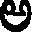

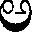

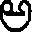

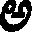

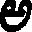

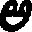

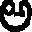

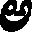

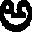

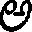

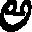

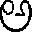

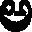

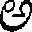

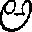

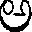

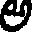

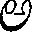

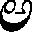

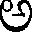

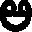

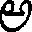

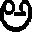

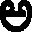

In [11]:
for img_path in aaa:
  display.display(Image.open(str(img_path)))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_HEIGHT = 32
IMG_WIDTH = 32
STEPS_PER_EPOCH = np.ceil(img_count/BATCH_SIZE)


In [14]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(class_names))

test_data_gen=test_image_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     )


Found 1080 images belonging to 43 classes.
Found 17 images belonging to 1 classes.


In [15]:
image_batch, label_batch = next(iter(train_data_gen))
#image_batch_train, label_batch_train = next(iter(train_generator))
test_batch,test_label=next(iter(test_data_gen))
print(image_batch.shape)
print(label_batch.shape)
print(label_batch)
print(image_batch)
dataset_labels = sorted(train_data_gen.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

(32, 32, 32, 3)
(32, 43)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [0.00784314 0.00784314 0.00784314]
   [0.9843138  0.9843138  0.9843138 ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.02745098 0.02745098 0.02745098]
   [1.         1.         1.        ]]

  ...

  [[0.0509804  0.0509804  0.0509804 ]
   [0.         0.         0.        ]
   [0.         0.        

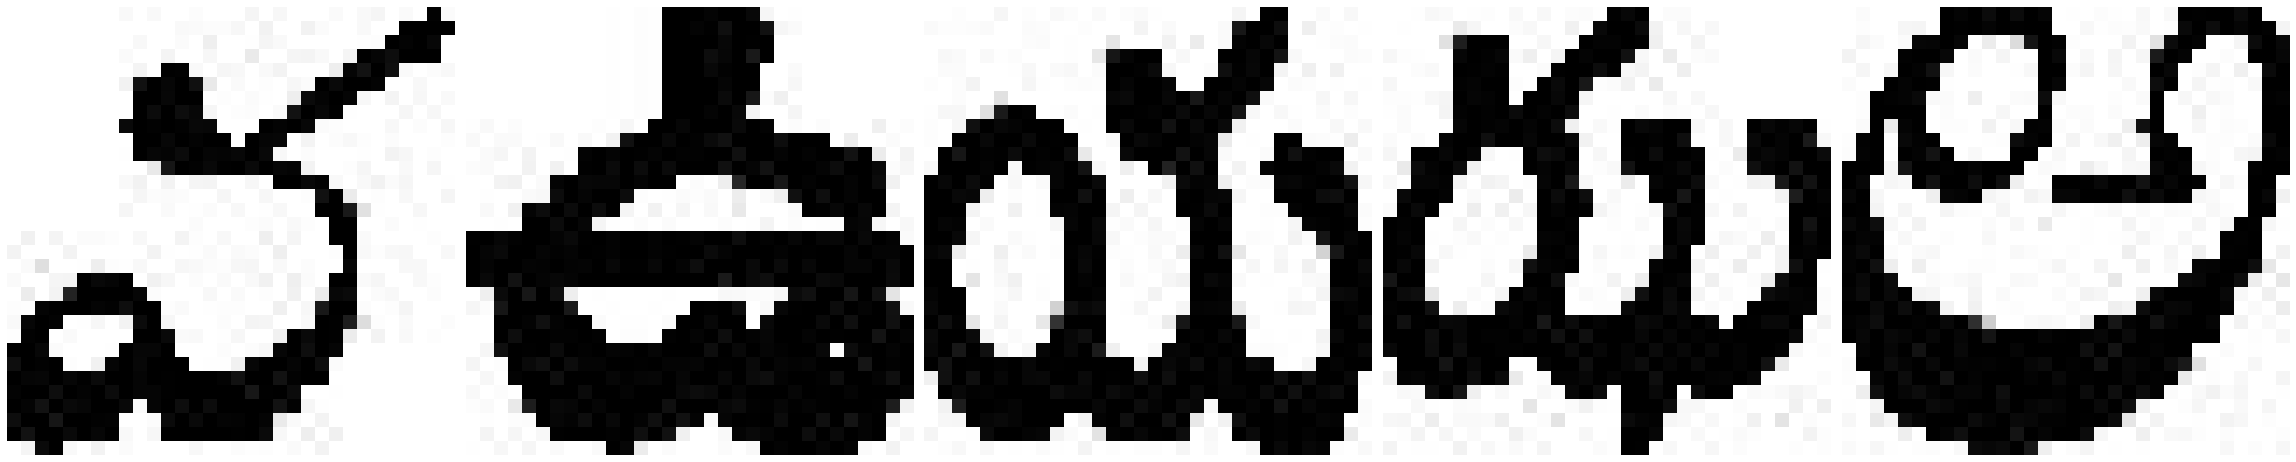

In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(32,32))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(image_batch[:5])


Model create

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [0]:
steps_per_epoch = np.ceil(train_data_gen.samples/train_data_gen.batch_size)

In [20]:
# model.fit(image_batch, label_batch ,epochs=20)
#Train the Model
hist = model.fit(
    train_data_gen, 
    epochs=20,
    verbose=1,
    steps_per_epoch=steps_per_epoch).history
#history = model.fit(image_batch, label_batch ,epochs=20)

Epoch 1/20
34/34 [==============================] - 1s 19ms/step - loss: 3.5605 - acc: 0.1009
Epoch 2/20
34/34 [==============================] - 1s 18ms/step - loss: 1.9740 - acc: 0.4593
Epoch 3/20
34/34 [==============================] - 1s 18ms/step - loss: 1.0649 - acc: 0.6991
Epoch 4/20
34/34 [==============================] - 1s 18ms/step - loss: 0.7340 - acc: 0.7833
Epoch 5/20
34/34 [==============================] - 1s 18ms/step - loss: 0.5875 - acc: 0.8130
Epoch 6/20
34/34 [==============================] - 1s 18ms/step - loss: 0.4677 - acc: 0.8491
Epoch 7/20
34/34 [==============================] - 1s 17ms/step - loss: 0.3774 - acc: 0.8806
Epoch 8/20
34/34 [==============================] - 1s 18ms/step - loss: 0.3130 - acc: 0.9065
Epoch 9/20
34/34 [==============================] - 1s 17ms/step - loss: 0.3013 - acc: 0.8981
Epoch 10/20
34/34 [==============================] - 1s 18ms/step - loss: 0.2753 - acc: 0.9093
Epoch 11/20
34/34 [==============================] - 1s 19m

No handles with labels found to put in legend.


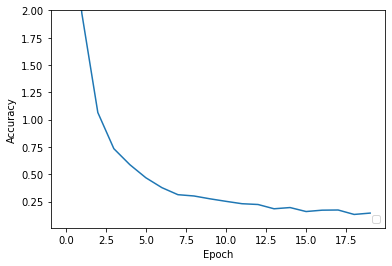

In [21]:
plt.plot(hist['loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.01, 2])
plt.legend(loc='lower right')


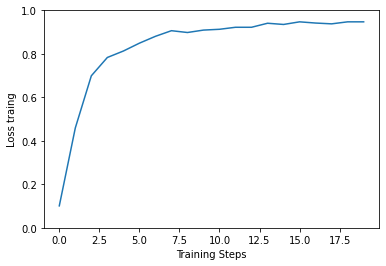

In [22]:
plt.figure()
plt.ylabel("Loss traing")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])


In [23]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
print(predicted_id)
predicted_label_batch = class_names[predicted_id]



label_id = np.argmax(label_batch, axis=-1)


[15 42 29 20 19 19 32  5 15 25 38 10  0 29 15  5 19 33 41  1  5 17 22  6
  8  0 24 41 12 30 39 26]


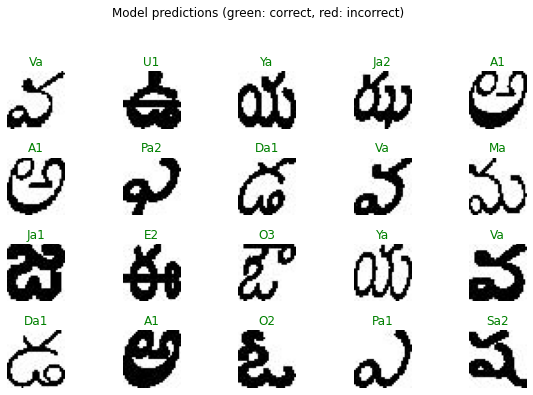

In [24]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(20):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")


In [25]:
predicted_batch = model.predict(test_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
print(predicted_id)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

[21 42 35 15 16 30 21 42 34 11 42 30 15 42 34 11 21]
['o1' 'u1' 'ba1' 'va' 'ga2' 'ksha' 'o1' 'u1' 'a2' 'ba2' 'u1' 'ksha' 'va'
 'u1' 'a2' 'ba2' 'o1']


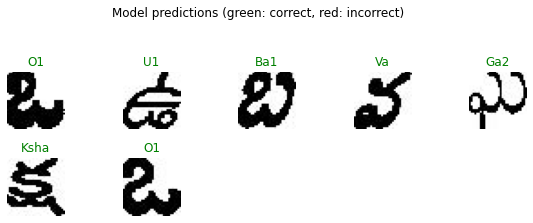

In [26]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(7):
  plt.subplot(6,5,n+1)
  plt.imshow(test_batch[n])

  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

